# Modelling and prediction of heart disease

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Attribute Information
1. age
2. sex (0=female and 1=male)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 0= less chance of heart attack 1= more chance of heart attack

### Cleaning the data and extracting important features

In [3]:
df = df.drop(['cp', 'restecg', 'oldpeak', 'slope', 'ca', 'thal'], axis=1)
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,target
0,63,1,145,233,1,150,0,1
1,37,1,130,250,0,187,0,1
2,41,0,130,204,0,172,0,1
3,56,1,120,236,0,178,0,1
4,57,0,120,354,0,163,1,1


### Attribute Information
1. age
2. sex (0=female and 1=male)
3. resting blood pressure
4. serum cholestoral in mg/dl
5. fasting blood sugar > 120 mg/dl
6. maximum heart rate achieved
7. exercise induced angina
8. target: 0= less chance of heart attack 1= more chance of heart attack

In [41]:
#Importing some classifications techniques from the sklearn library
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [50]:
#Converting data to numpy array
import numpy as np
age = np.expand_dims(df.age.to_numpy(), -1)
sex = np.expand_dims(df.sex.to_numpy(), -1)
trestbps = np.expand_dims(df.trestbps.to_numpy(), -1)
chol = np.expand_dims(df.chol.to_numpy(), -1)
fbs = np.expand_dims(df.fbs.to_numpy(), -1)
thalach = np.expand_dims(df.thalach.to_numpy(), -1)
exang = np.expand_dims(df.exang.to_numpy(), -1)
X = np.append(age, sex, axis=1)
X = np.append(X, trestbps, axis=1)
X = np.append(X, chol, axis=1)
X = np.append(X, fbs, axis=1)
X = np.append(X, thalach, axis=1)
X = np.append(X, exang, axis=1)
y = np.expand_dims(df.target.to_numpy(), -1)

In [51]:
#Using train-test split
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.30)

In [58]:
#Fitting a Logistic Regression Model
lr_model = LR()
lr_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
#Finding the accuracy of classes
from sklearn.metrics import confusion_matrix
y_hat = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = lr_model.score(X_test, y_test)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 69.70
The accuracy for class 1 is 77.59
The accuracy for the model is 74.73


In [60]:
#Fitting a Logistic Regression Model which has balanced class weights
lr_model = LR(class_weight='balanced')
lr_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [61]:
#Finding the accuracy of classes
from sklearn.metrics import confusion_matrix
y_hat = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_hat)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = lr_model.score(X_test, y_test)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 69.70
The accuracy for class 1 is 79.31
The accuracy for the model is 75.82


In [62]:
#Fitting a SVC Model
svm_model = SVC()
svm_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [63]:
#Finding the accuracy of classes
yhat = svm_model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = svm_model.score(X_test, y_test)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 57.58
The accuracy for class 1 is 70.69
The accuracy for the model is 65.93


In [64]:
#Fitting a SVC Model which has balanced class weights
svm_model = SVC(class_weight='balanced')
svm_model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(class_weight='balanced')

In [65]:
#Finding the accuracy of classes
yhat = svm_model.predict(X_test)
cm = confusion_matrix(y_test, yhat)
tn, fp, fn, tp = cm.ravel()
a0 = (tn*100)/(tn+fp)
a1 = (tp*100)/(tp+fn)
a = svm_model.score(X_test, y_test)*100
print("The accuracy for class 0 is %.2f" %a0)
print("The accuracy for class 1 is %.2f" %a1)
print("The accuracy for the model is %.2f" %a)

The accuracy for class 0 is 60.61
The accuracy for class 1 is 68.97
The accuracy for the model is 65.93


Text(0, 0.5, 'Accuracy')

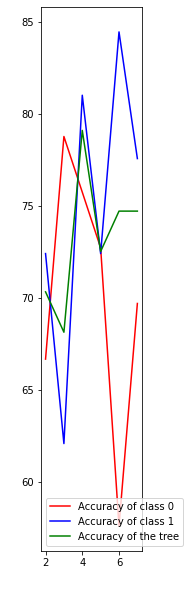

In [66]:
#Using Decision Tree Classifier with balanced class weights and various depths
import matplotlib.pyplot as plt
#2
Tree2 = DecisionTreeClassifier(criterion="entropy", max_depth = 2, class_weight='balanced')
Tree2.fit(X_train, y_train)
predTree2 = Tree2.predict(X_test)
cm = confusion_matrix(y_test, predTree2)
tn, fp, fn, tp = cm.ravel()
a0_p1 = (tn*100)/(tn+fp)
a1_p1 = (tp*100)/(tp+fn)
a_p1 = Tree2.score(X_test, y_test)*100
#3
Tree3 = DecisionTreeClassifier(criterion="entropy", max_depth = 3, class_weight='balanced')
Tree3.fit(X_train, y_train)
predTree3 = Tree3.predict(X_test)
cm = confusion_matrix(y_test, predTree3)
tn, fp, fn, tp = cm.ravel()
a0_p2 = (tn*100)/(tn+fp)
a1_p2 = (tp*100)/(tp+fn)
a_p2 = Tree3.score(X_test, y_test)*100
#4
Tree4 = DecisionTreeClassifier(criterion="entropy", max_depth = 4, class_weight='balanced')
Tree4.fit(X_train, y_train)
predTree4 = Tree4.predict(X_test)
cm = confusion_matrix(y_test, predTree4)
tn, fp, fn, tp = cm.ravel()
a0_p3 = (tn*100)/(tn+fp)
a1_p3 = (tp*100)/(tp+fn)
a_p3 = Tree4.score(X_test, y_test)*100
#5
Tree5 = DecisionTreeClassifier(criterion="entropy", max_depth = 5, class_weight='balanced')
Tree5.fit(X_train, y_train)
predTree5 = Tree5.predict(X_test)
cm = confusion_matrix(y_test, predTree5)
tn, fp, fn, tp = cm.ravel()
a0_p4 = (tn*100)/(tn+fp)
a1_p4 = (tp*100)/(tp+fn)
a_p4 = Tree5.score(X_test, y_test)*100
#6
Tree6 = DecisionTreeClassifier(criterion="entropy", max_depth = 6, class_weight='balanced')
Tree6.fit(X_train, y_train)
predTree6 = Tree6.predict(X_test)
cm = confusion_matrix(y_test, predTree6)
tn, fp, fn, tp = cm.ravel()
a0_p5 = (tn*100)/(tn+fp)
a1_p5 = (tp*100)/(tp+fn)
a_p5 = Tree6.score(X_test, y_test)*100
#7
Tree7 = DecisionTreeClassifier(criterion="entropy", max_depth = 7, class_weight='balanced')
Tree7.fit(X_train, y_train)
predTree7 = Tree7.predict(X_test)
cm = confusion_matrix(y_test, predTree7)
tn, fp, fn, tp = cm.ravel()
a0_p6 = (tn*100)/(tn+fp)
a1_p6 = (tp*100)/(tp+fn)
a_p6 = Tree7.score(X_test, y_test)*100
figure = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_aspect('equal')
x_list = [2,3,4,5,6,7]
a0_list = [a0_p1,a0_p2,a0_p3,a0_p4,a0_p5,a0_p6]
a1_list = [a1_p1,a1_p2,a1_p3,a1_p4,a1_p5,a1_p6]
a_list = [a_p1,a_p2,a_p3,a_p4,a_p5,a_p6]
axes.plot(x_list, a0_list, c='r',label="Accuracy of class 0")
axes.plot(x_list, a1_list, c='b',label="Accuracy of class 1")
axes.plot(x_list, a_list, c='g',label="Accuracy of the tree")
axes.legend(loc='lower left')
plt.xlabel('Max Depth', c='w')
plt.ylabel('Accuracy', c='w')

# Conclusion
The best model to fit the data is the Decision Tree Classifier with criteria as entropy and a maximum tree depth of 4 out of all the models that were creating using the given data. The best model has balanced class weights and an accuracy of 79.12 (2 decimal places).